In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
#step one: play with time date features 

In [2]:
df= pd.read_csv('train.csv', index_col=0, parse_dates=True)
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [3]:
df_reg = df.drop(['count', 'casual'], axis=1)
df_cas = df.drop(['count', 'registered'], axis = 1)

<AxesSubplot:ylabel='datetime'>

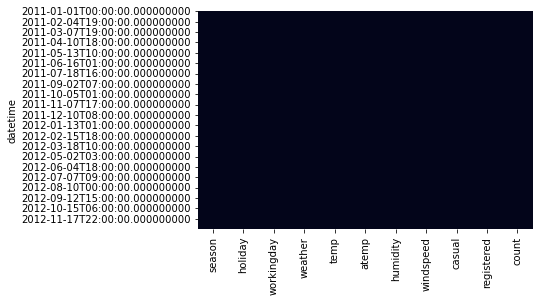

In [4]:
#null values?? 
sns.heatmap(df.isnull(), cbar=False) #apaprently none- although should be from 20th every month?? 
#df.isnull.sum() -> another way

In [5]:
downsampled3 = df.resample('D').mean()
#downsampled3[['workingday', 'weekday']].head(50) #shows that 0's are the weekend days can plot based on this

In [6]:
dfcorr= df[['humidity', 'temp', 'windspeed', 'atemp']]
dfcorr

,humidity,temp,windspeed,atemp
datetime,,,,
2011-01-01 00:00:00,81,9.84,0.0000,14.395
2011-01-01 01:00:00,80,9.02,0.0000,13.635
2011-01-01 02:00:00,80,9.02,0.0000,13.635
2011-01-01 03:00:00,75,9.84,0.0000,14.395
2011-01-01 04:00:00,75,9.84,0.0000,14.395
...,...,...,...,...
2012-12-19 19:00:00,50,15.58,26.0027,19.695
2012-12-19 20:00:00,57,14.76,15.0013,17.425
2012-12-19 21:00:00,61,13.94,15.0013,15.910


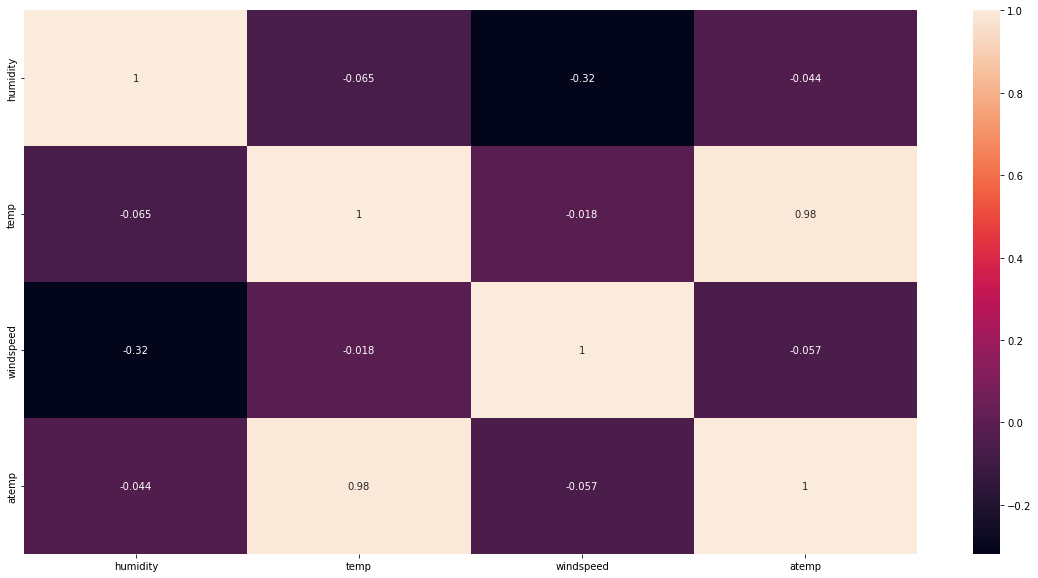

In [7]:
#Step two: EDA !!! 

#first up- correlations between continuous features
sns.heatmap(dfcorr.corr(),  annot=True)
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(20, 10) 


#going to drop casual, reg and atemp because of multicollinearity-> not good for cat vars (chi square better !!!)

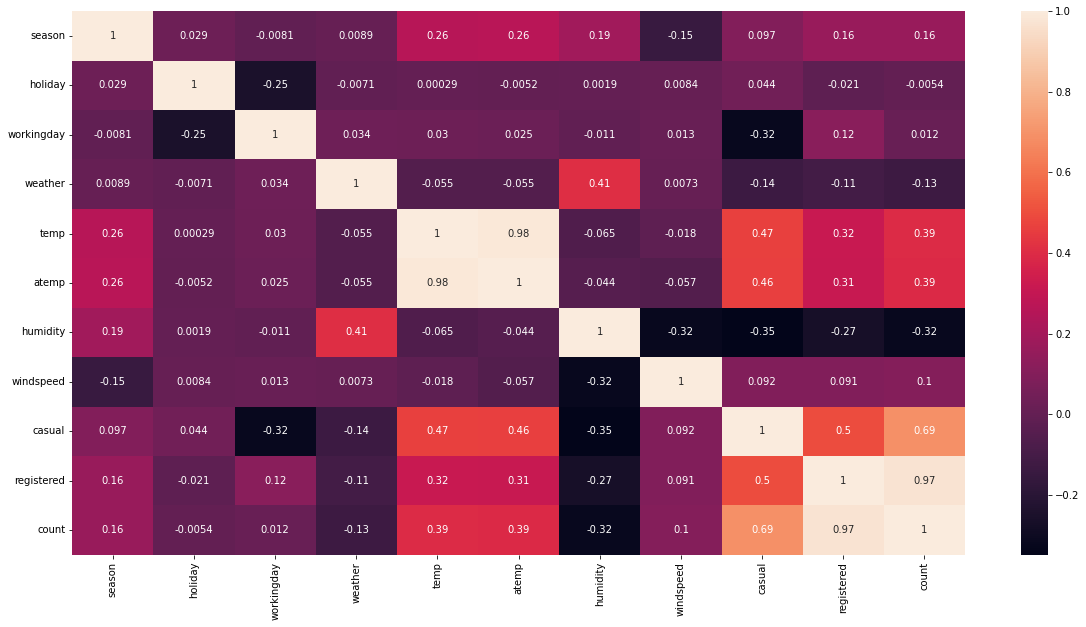

In [43]:
sns.heatmap(df.corr(),  annot=True)
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(20, 10) 

In [8]:
pip install dython

Note: you may need to restart the kernel to use updated packages.


In [9]:
from dython.nominal import associations
#https://medium.com/@knoldus/how-to-find-correlation-value-of-categorical-variables-23de7e7a9e26
#http://shakedzy.xyz/dython/getting_started/examples/
#https://pypi.org/project/dython/

#http://shakedzy.xyz/dython/modules/nominal/#associations
#https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792


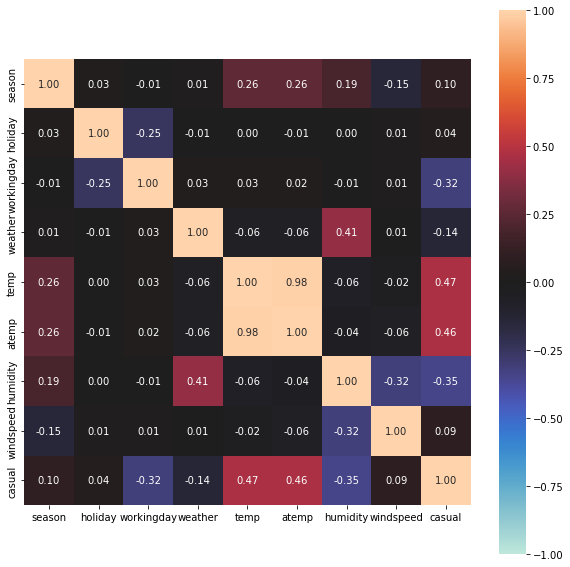

In [10]:
complete_corr = associations(df_cas, figsize=(10,10))

In [42]:
df_complete_corr=complete_corr['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

C:\Users\alexp\AppData\Local\Temp/ipykernel_14344/404736462.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual
season,1.00,0.03,-0.01,0.01,0.26,0.26,0.19,-0.15,0.10
holiday,0.03,1.00,-0.25,-0.01,0.00,-0.01,0.00,0.01,0.04
workingday,-0.01,-0.25,1.00,0.03,0.03,0.02,-0.01,0.01,-0.32
weather,0.01,-0.01,0.03,1.00,-0.06,-0.06,0.41,0.01,-0.14
temp,0.26,0.00,0.03,-0.06,1.00,0.98,-0.06,-0.02,0.47
atemp,0.26,-0.01,0.02,-0.06,0.98,1.00,-0.04,-0.06,0.46
humidity,0.19,0.00,-0.01,0.41,-0.06,-0.04,1.00,-0.32,-0.35
windspeed,-0.15,0.01,0.01,0.01,-0.02,-0.06,-0.32,1.00,0.09
casual,0.10,0.04,-0.32,-0.14,0.47,0.46,-0.35,0.09,1.00


In [82]:
df_dayavg = df.resample('D').mean()
#df_dayavg to look at least noisy scatter plot

<AxesSubplot:xlabel='windspeed', ylabel='count'>

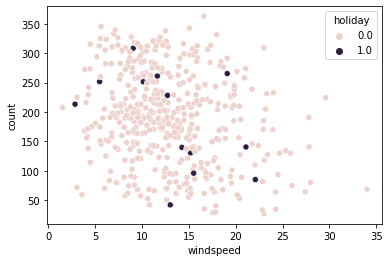

In [8]:
#scatterplots looking at float values with various hues
sns.scatterplot(data=df_dayavg, x= 'windspeed', y='count', hue='holiday')

#windspeed scattered on all days and seasons (non linear) -> polynomial?? 

<AxesSubplot:xlabel='temp', ylabel='count'>

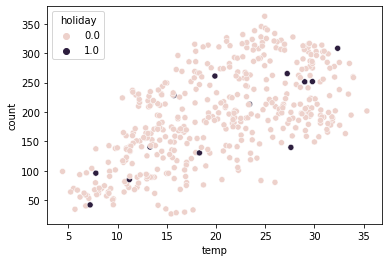

In [9]:
#scatterplots looking at count and temp based on holiday or not
sns.scatterplot(data=df_dayavg, x= 'temp', y='count', hue='holiday')

#temp approx linear with count (good measure)-> higher weight? holiday doesnt seem to have much effect
#temp and season v interesting -> seasons two and four similar temp, but s4 seems to have higher count (autumn?)-> or maybe see bc darker dot should chec

<AxesSubplot:xlabel='humidity', ylabel='count'>

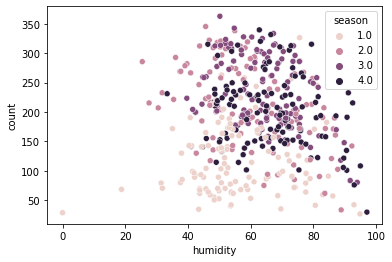

In [10]:
#scatterplots looking at count and temp based on holiday or not
sns.scatterplot(data=df_dayavg, x= 'humidity', y='count', hue='season')

#humidity not as linear, polynomial also?? OR combine windspeed and humidity? 

In [11]:
#sns.scatterplot(data=df_dayavg, x= 'humidity', y='windspeed')
#totally not correlated 

<AxesSubplot:xlabel='season'>

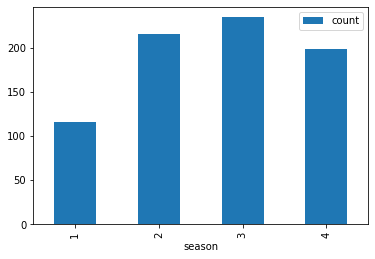

In [12]:
#using groupby to look at the mean at specific time periods 
df.groupby('season').agg('mean')[['count']].plot(kind='bar')
#highest in spring and summer -> would it be better to use months because more granular ?

In [13]:
df['weekday']=df.index.day_of_week #good predictor probably (recurring things happening per day of week)
df['time']=df.index.hour
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,time
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2,21


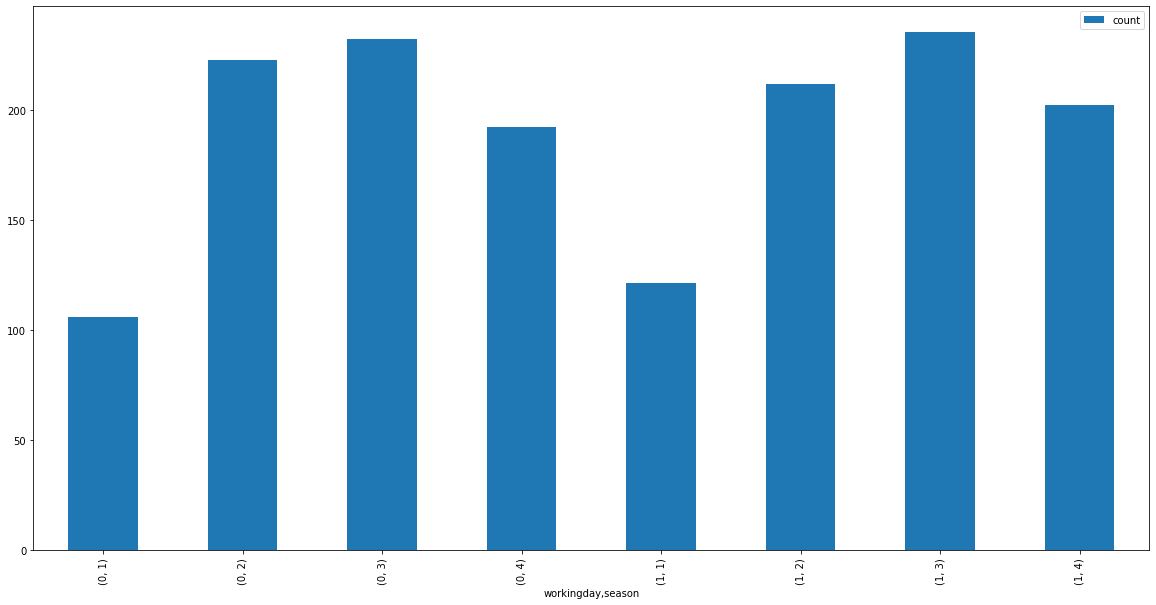

In [14]:
df.groupby(['workingday' ,'season']).agg('mean')[['count']].plot(kind='bar') #pretty much even through out week 
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(20, 10) 

#seasonal pattern reflected in weekdays, and ofc also in binary workingday -> smart to make an interaction term between season and working day? 


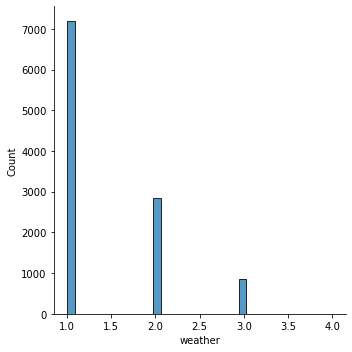

In [15]:
#what kind of var weather?
sns.displot(df, x="weather")#look at weather-> need to OHE it?? yes values 1-3 

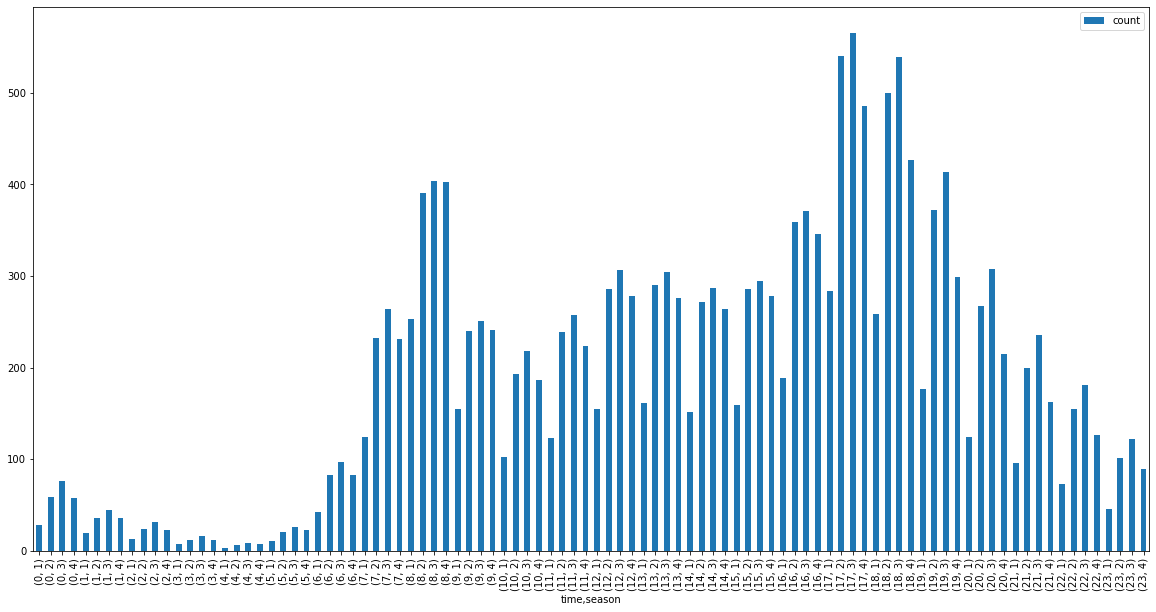

In [16]:
df.groupby(['time' ,'season']).agg('mean')[['count']].plot(kind='bar') #pretty much even through out week 

fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(20, 10) 

In [34]:
#plot how rental count is on working days versus weekends based on time of day
#df.groupby(['time' ,'workingday']) ('mean')[['count']].plot(kind='bar') #pretty much even through out week 

fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(20, 10) 

<Figure size 1440x720 with 0 Axes>

In [18]:
df.dtypes #all floats->scale , all int OHE

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
weekday         int64
time            int64
dtype: object

In [19]:
#times of day for plotting (doesnt really make sense here based on above dist-> better to use based on separate DF below!) 
for a in df:
    df.loc[ (df['time']> 0) & (df['time'] <= 4), 'time'] = 0
    df.loc[ (df['time']> 4) & (df['time'] <= 8), 'time'] = 1
    df.loc[ (df['time'] > 8) & (df['time'] <= 13), 'time']= 3
    df.loc[ (df['time'] > 13) & (df['time'] <= 16), 'time']= 4
    df.loc[ (df['time'] > 16) & (df['time'] <= 23 )& (df['time'] ==0 ), 'time']=5
    df['time'] = df['time'] .astype(int) 

In [20]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,time
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,5,0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,5,0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,5,0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2,21


In [27]:
#model cas

df_cas['weekday']=df.index.day_of_week 
df_cas['time']=df.index.hour
#look at dist for times during holidays (scatter and countplots)

In [28]:
df_cas

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,weekday,time
datetime,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0000,3,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0000,8,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0000,5,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0000,3,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0000,0,5,4
...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,50,26.0027,7,2,19
2012-12-19 20:00:00,4,0,1,1,14.76,57,15.0013,10,2,20
2012-12-19 21:00:00,4,0,1,1,13.94,61,15.0013,4,2,21


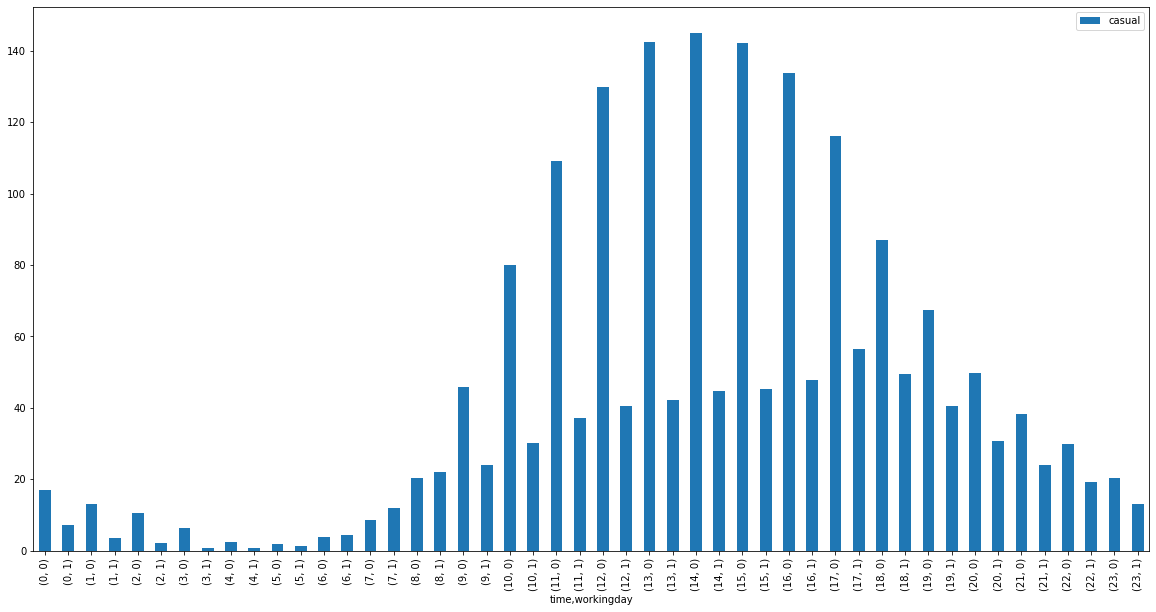

In [29]:
#plot how rental count is on working days versus weekends based on time of day
df_cas.groupby(['time','workingday']).agg('mean')[['casual']].plot(kind='bar') #pretty much even through out week 

fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(20, 10) 

#obviously much higher 

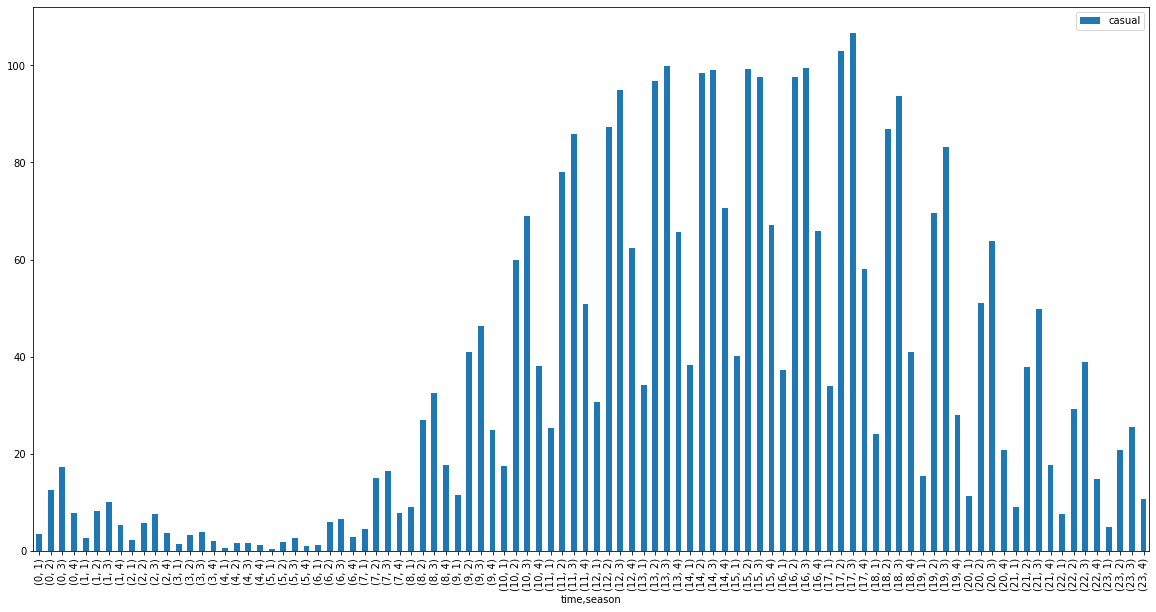

In [30]:
#plot how rental count is on working days versus weekends based on time of day
df_cas.groupby(['time','season']).agg('mean')[['casual']].plot(kind='bar') #pretty much even through out week 

fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(20, 10) 


<AxesSubplot:xlabel='humidity', ylabel='casual'>

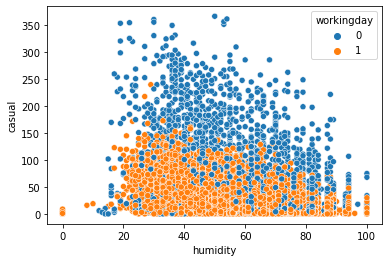

In [45]:
#scatterplots looking at count and temp based on holiday or not
sns.scatterplot(data=df_cas, x= 'humidity', y='casual', hue='workingday')

#humidity not as linear, polynomial also?? OR combine windspeed and humidity? 

<AxesSubplot:xlabel='temp', ylabel='casual'>

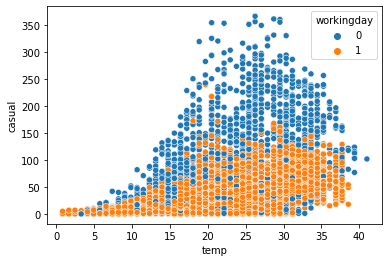

In [46]:
#scatterplots looking at count and temp based on holiday or not
sns.scatterplot(data=df_cas, x= 'temp', y='casual', hue='workingday')

#humidity not as linear, polynomial also?? OR combine windspeed and humidity? 

<AxesSubplot:xlabel='windspeed', ylabel='casual'>

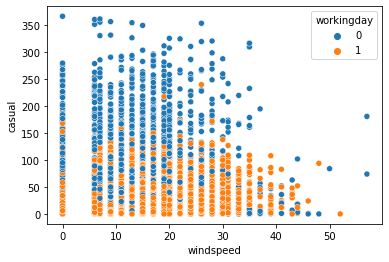

In [34]:
#scatterplots looking at count and temp based on holiday or not
sns.scatterplot(data=df_cas, x= 'windspeed', y='casual', hue='workingday')

#humidity not as linear, polynomial also?? OR combine windspeed and humidity?

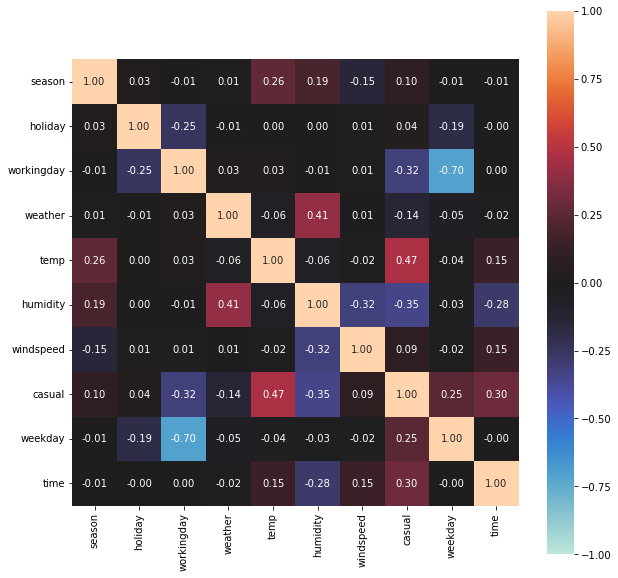

In [35]:
cas_corr = associations(df_cas, figsize=(10,10))
#doesnt include my vars of weekday and time ...?

In [41]:
f_complete_corr=cas_corr['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

C:\Users\alexp\AppData\Local\Temp/ipykernel_14344/3229836820.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual
season,1.00,0.03,-0.01,0.01,0.26,0.26,0.19,-0.15,0.10
holiday,0.03,1.00,-0.25,-0.01,0.00,-0.01,0.00,0.01,0.04
workingday,-0.01,-0.25,1.00,0.03,0.03,0.02,-0.01,0.01,-0.32
weather,0.01,-0.01,0.03,1.00,-0.06,-0.06,0.41,0.01,-0.14
temp,0.26,0.00,0.03,-0.06,1.00,0.98,-0.06,-0.02,0.47
atemp,0.26,-0.01,0.02,-0.06,0.98,1.00,-0.04,-0.06,0.46
humidity,0.19,0.00,-0.01,0.41,-0.06,-0.04,1.00,-0.32,-0.35
windspeed,-0.15,0.01,0.01,0.01,-0.02,-0.06,-0.32,1.00,0.09
casual,0.10,0.04,-0.32,-0.14,0.47,0.46,-0.35,0.09,1.00


In [20]:
#df_cas.drop(['atemp'], axis=1, inplace=True)
df_cas

,season,holiday,workingday,weather,temp,humidity,windspeed,casual
datetime,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0000,3
2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0000,8
2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0000,5
2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0000,3
2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0000,0
...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,50,26.0027,7
2012-12-19 20:00:00,4,0,1,1,14.76,57,15.0013,10
2012-12-19 21:00:00,4,0,1,1,13.94,61,15.0013,4


In [56]:
#model reg 

df_reg['weekday']=df.index.day_of_week #pd.to_DataFrame (save transformed var to see)
df_reg['time']=df.index.hour
df_reg #look at dist for times during workday (scatter and count plots )

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,registered,weekday,time
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,13,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,27,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,10,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,329,2,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,231,2,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,164,2,21


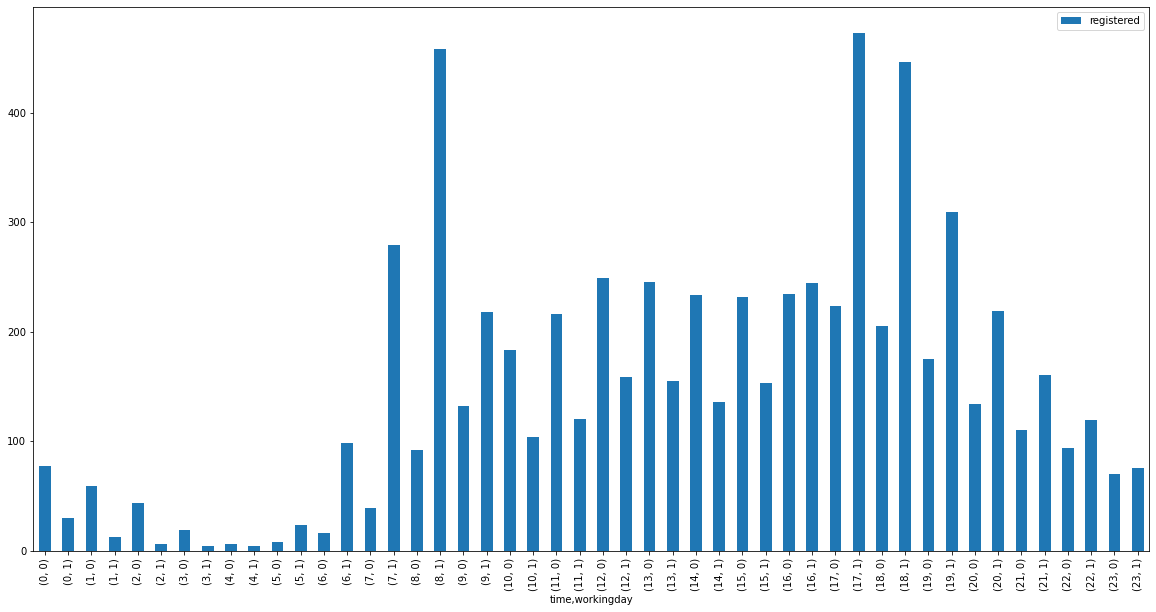

In [58]:
#plot how rental count is on working days versus weekends based on time of day
df_reg.groupby(['time','workingday']).agg('mean')[['registered']].plot(kind='bar') #pretty much even through out week 

fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(20, 10) 

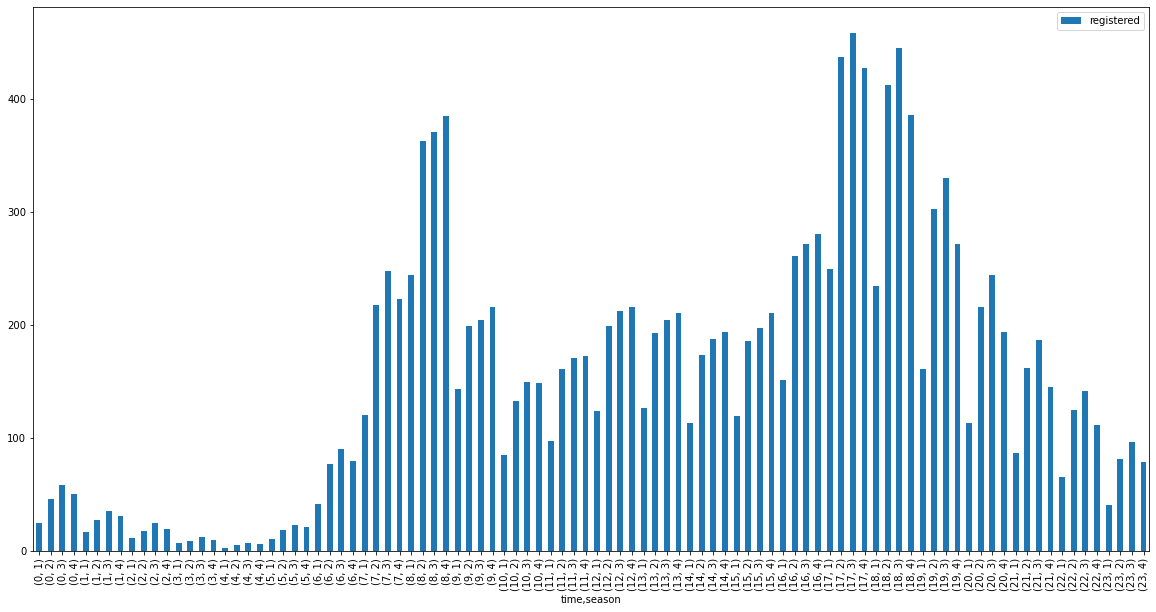

In [60]:
#plot how rental count is during seasons based on time of day
df_reg.groupby(['time','season']).agg('mean')[['registered']].plot(kind='bar')

fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(20, 10) 

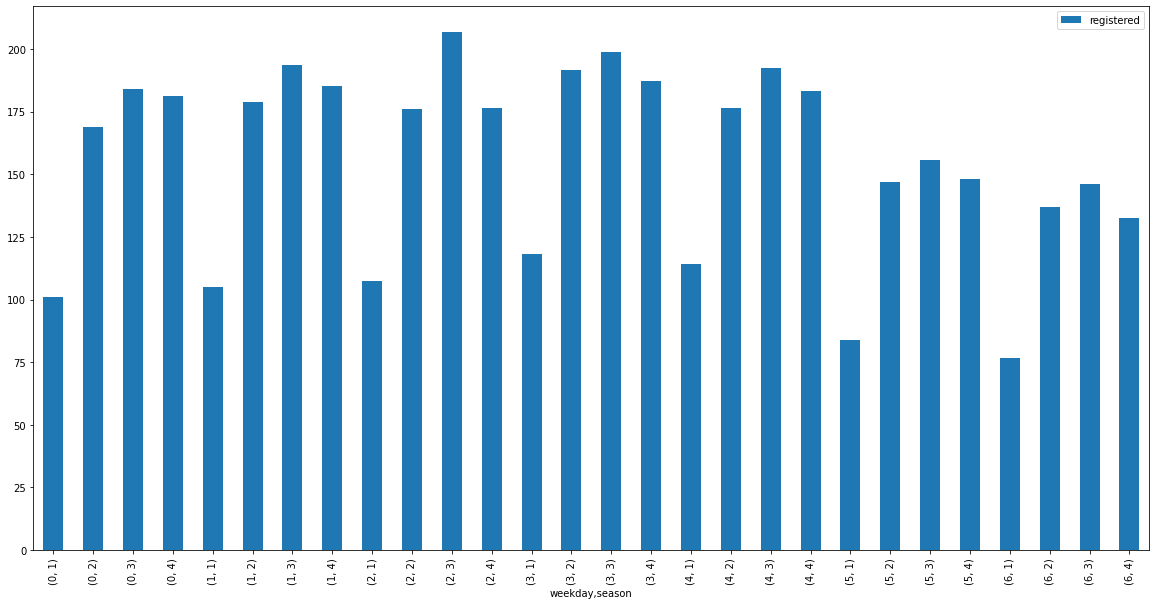

In [61]:
#plot how rental count is during seasons based on time of day
df_reg.groupby(['weekday','season']).agg('mean')[['registered']].plot(kind='bar')

fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(20, 10) 

<AxesSubplot:xlabel='humidity', ylabel='registered'>

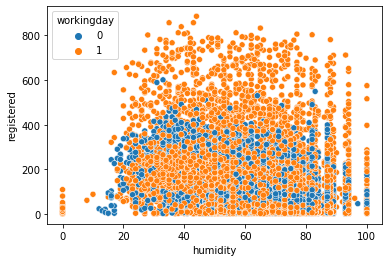

In [67]:
#scatterplots looking at count and temp based on holiday or not
sns.scatterplot(data=df_reg, x= 'humidity', y='registered', hue='workingday')

#humidity not as linear, polynomial also?? OR combine windspeed and humidity? 

<AxesSubplot:xlabel='temp', ylabel='registered'>

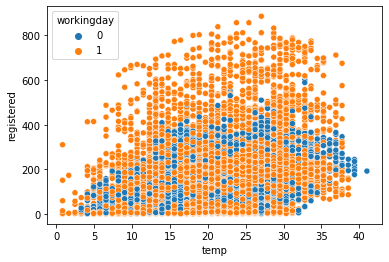

In [48]:
#scatterplots looking at count and temp based on holiday or not
sns.scatterplot(data=df_reg, x= 'temp', y='registered', hue='workingday')

#humidity not as linear, polynomial also?? OR combine windspeed and humidity? 

<AxesSubplot:xlabel='windspeed', ylabel='registered'>

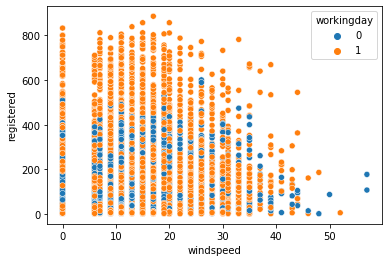

In [49]:
#scatterplots looking at count and temp based on holiday or not
sns.scatterplot(data=df_reg, x= 'windspeed', y='registered', hue='workingday')

#humidity not as linear, polynomial also?? OR combine windspeed and humidity?

In [ ]:
#EDA of cat features using chi square: 

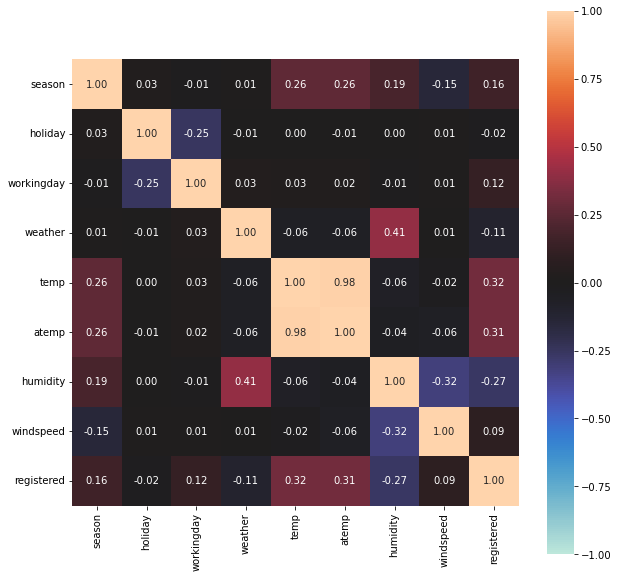

In [39]:
reg_corr = associations(df_reg, figsize=(10,10))
#doesnt include my vars of weekday and time ...?

In [40]:
reg_complete_corr=reg_corr['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

C:\Users\alexp\AppData\Local\Temp/ipykernel_14344/1881969861.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual
season,1.00,0.03,-0.01,0.01,0.26,0.26,0.19,-0.15,0.10
holiday,0.03,1.00,-0.25,-0.01,0.00,-0.01,0.00,0.01,0.04
workingday,-0.01,-0.25,1.00,0.03,0.03,0.02,-0.01,0.01,-0.32
weather,0.01,-0.01,0.03,1.00,-0.06,-0.06,0.41,0.01,-0.14
temp,0.26,0.00,0.03,-0.06,1.00,0.98,-0.06,-0.02,0.47
atemp,0.26,-0.01,0.02,-0.06,0.98,1.00,-0.04,-0.06,0.46
humidity,0.19,0.00,-0.01,0.41,-0.06,-0.04,1.00,-0.32,-0.35
windspeed,-0.15,0.01,0.01,0.01,-0.02,-0.06,-0.32,1.00,0.09
casual,0.10,0.04,-0.32,-0.14,0.47,0.46,-0.35,0.09,1.00
